# EC7212 – Computer Vision and Image Processing



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)  

##  1. Loading Original Image

Found image at Images/Nature.jpg


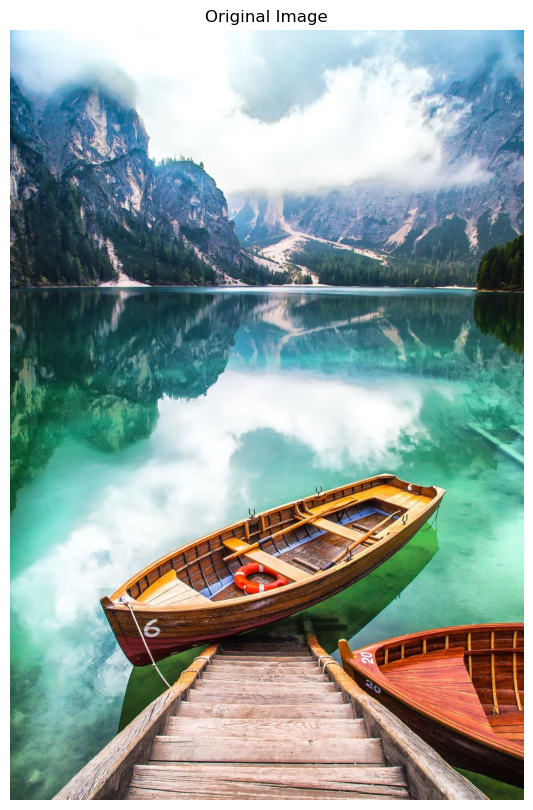

In [2]:
input_image_path = "Images/Nature.jpg"

if os.path.exists(input_image_path):
    print(f"Found image at {input_image_path}")
else:
    print(f"Image not found at {input_image_path}. Please check the path.")

original_image = cv2.imread(input_image_path)
if original_image is not None:
    
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    
    plt.figure()
    plt.imshow(original_image_rgb)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
else:
    print("Failed to load the image. Please check the file path and format.")

##  2. Reducing the Number of Intensity Levels in an Image

various levels: 128, 64, 16, 8, 2.

In [3]:
def intensity_level(image, levels):
    
    if not (levels > 0 and (levels & (levels-1) == 0)):
        raise ValueError("Number of levels must be a positive power of 2")
    
    
    factor = 256 // levels
    
    
    return (image // factor) * factor

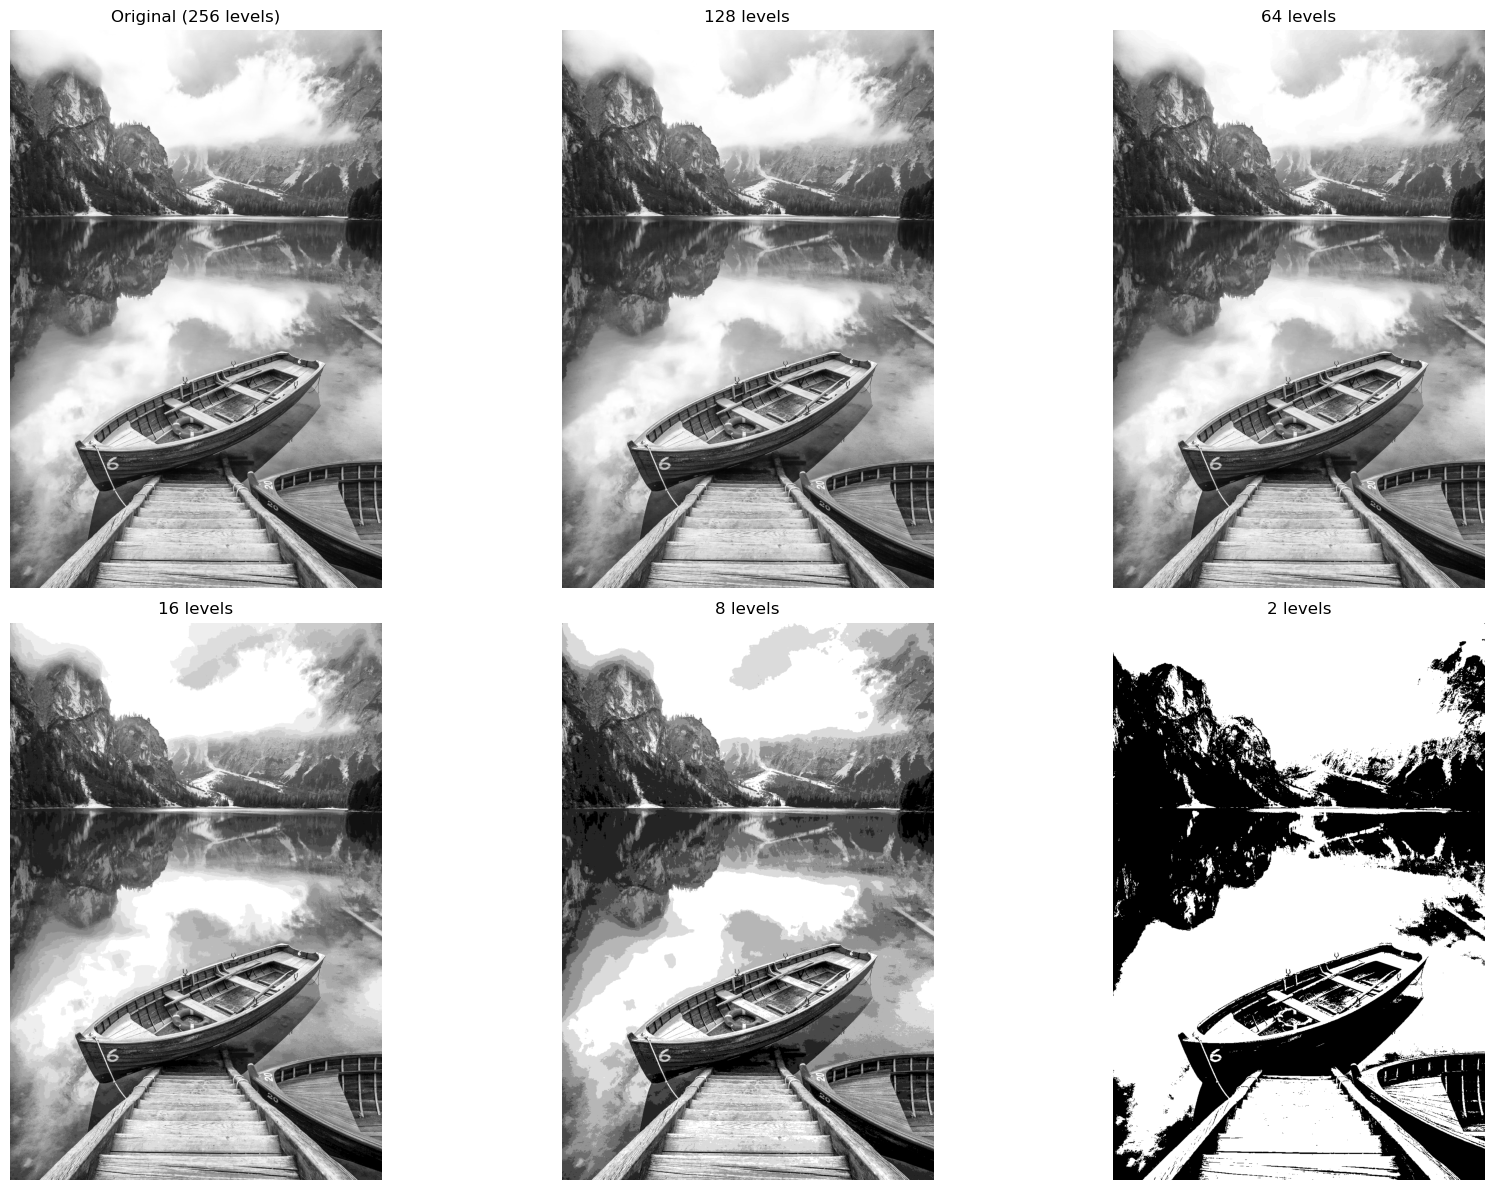

In [4]:
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

levels = [128, 64, 16, 8, 2]

plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.title("Original (256 levels)")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

for i, level in enumerate(levels):
    reduced = intensity_level(gray_image, level)
    
    plt.subplot(2, 3, i+2)
    plt.title(f"{level} levels")
    plt.imshow(reduced, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

## 3. Spatial Averaging with Different Neighborhood Sizes

In [5]:
def spatial_avg(image, kernel_size):
    
   
    if kernel_size <= 0 or not isinstance(kernel_size, int):
        raise ValueError("Kernel size must be a positive integer")
    
   
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    
    
    averaged = cv2.filter2D(image, -1, kernel)
    
    return averaged

NameError: name 'spatial_average' is not defined

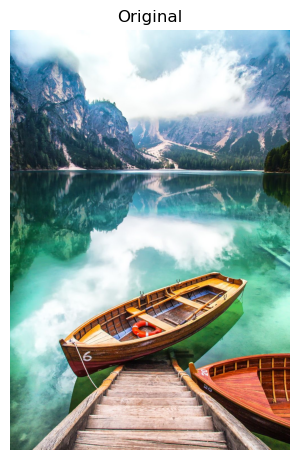

In [6]:
kernel_sizes = [3, 10, 20]

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(original_image_rgb)
plt.axis('off')

for i, size in enumerate(kernel_sizes):
    averaged = spatial_average(original_image, size)
    averaged_rgb = cv2.cvtColor(averaged, cv2.COLOR_BGR2RGB)
    
    plt.subplot(2, 2, i+2)
    plt.title(f"{size}x{size} Neighborhood")
    plt.imshow(averaged_rgb)
    plt.axis('off')

plt.tight_layout()
plt.show()

## 4. Rotating an Image by 45 and 90 Degrees


In [ ]:
def img_rotate(image, angle):
    
    height, width = image.shape[:2]
    
    
    center = (width // 2, height // 2)
    
    
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    
    cos = np.abs(rotation_matrix[0, 0])
    sin = np.abs(rotation_matrix[0, 1])
    
    new_width = int((height * sin) + (width * cos))
    new_height = int((height * cos) + (width * sin))
    
    
    rotation_matrix[0, 2] += (new_width / 2) - center[0]
    rotation_matrix[1, 2] += (new_height / 2) - center[1]
   
    
    rotated = cv2.warpAffine(image, rotation_matrix, (new_width, new_height))
    
    return rotated

In [ ]:
angles = [45, 90]

plt.figure(figsize=(18, 12))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(original_image_rgb)
plt.axis('off')

for i, angle in enumerate(angles):
    rotated = rotate_image(original_image, angle)
    rotated_rgb = cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)
    
    plt.subplot(1, 3, i+2)
    plt.title(f"Rotated by {angle}°")
    plt.imshow(rotated_rgb)
    plt.axis('off')

plt.tight_layout()
plt.show()

## 5. Block Averaging for Spatial Resolution Reduction


In [ ]:
def block_avg(image, block_size):
    
    if block_size <= 0 or not isinstance(block_size, int):
        raise ValueError("Block size must be a positive integer")
    
    height, width = image.shape[:2]
    channels = 1 if len(image.shape) == 2 else image.shape[2]
  
    
    new_height = height // block_size
    new_width = width // block_size
    
    
    if channels == 1:
        result = np.zeros((new_height, new_width), dtype=image.dtype)
    else:
        result = np.zeros((new_height, new_width, channels), dtype=image.dtype)
    
    
    for i in range(new_height):
        for j in range(new_width):
            #
            y_start = i * block_size
            y_end = (i + 1) * block_size
            x_start = j * block_size
            x_end = (j + 1) * block_size
            
            
            block = image[y_start:y_end, x_start:x_end]
            result[i, j] = np.mean(block, axis=(0, 1))
    
    
    result_resized = cv2.resize(result, (width, height), interpolation=cv2.INTER_NEAREST)
    
    return result_resized

//yu

In [ ]:
block_sizes = [3, 5, 7]

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(original_image_rgb)
plt.axis('off')

for i, size in enumerate(block_sizes):
    block_averaged = block_average(original_image, size)
    block_averaged_rgb = cv2.cvtColor(block_averaged, cv2.COLOR_BGR2RGB)
    
    plt.subplot(2, 2, i+2)
    plt.title(f"{size}x{size} Block Average")
    plt.imshow(block_averaged_rgb)
    plt.axis('off')

plt.tight_layout()
plt.show()